## Capstone Project — The Battle of Neighbourhoods
Introduction
New Delhi is the capital city of India. The city itself has a population of 257,803. 
From different parts of India many people goes to Delhi for different purposes like construction work, IT Job, Business, Travel with family,Students etc.. First thing which people encounter in which area they will stay. Now staying in an area depends on different aspects too like availability for food,most importantly if you are foodie, budget and bviously other amenities. So, we need to build this code to check which area is best for different category of people.For example, most north indian persons like chinese food so they can easily get the exact recommendation according to their need.

With it’s diverse culture , comes diverse food items,ethnicity. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .

# Questions that can be asked using the above mentioned datasets
What is best location for Chinese food ?
Which area is having large number of north indian foods ?
Which area is not having sufficient restaurants ?
Best place to stay as per chinese cuisine selection ?
In New delhi what are the best restaurants?

# For this project we need the following data :

New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
Data source : https://www.kaggle.com/shrutimehta/zomato-restaurants-data
Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
Nearby places in each locality of new delhi city.
Data source : https://developer.foursquare.com/
Description : By using this api we will get all the venues in each neighborhood.

# Approach
Collect the new delhi city data from Zomato kaggel dataset
Using FourSquare API we will find all venues for each neighborhood.
Filter out all venues that are nearby by locality.
Using aggregative rating for each resturant to find the best places.
Visualize the Ranking of neighborhoods using folium library(python)

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

/bin/bash: conda: command not found
     |████████████████████████████████| 102kB 2.3MB/s 


Reading Restaurant data from CSV file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  ...  Rating text Votes
0        6317637        Le Petit Souffle  ...    Excellent   314
1        6304287        Izakaya Kikufuji  ...    Excellent   591
2        6300002  Heat - Edsa Shangri-La  ...    Very Good   270
3        6318506                    Ooma  ...    Excellent   365
4        6314302             Sambo Kojin  ...    Excellent   229

[5 rows x 21 columns]

In [3]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code  ... Rating color Rating text Votes
0       18287358       Food Cloud             1  ...        White   Not rated     2
1       18216944        Burger.in             1  ...       Orange     Average    46
2         313333  Days of the Raj             1  ...       Orange     Average    45
3       18384127   Dilli Ka Dhaba             1  ...       Orange     Average    11
4            582        Govardhan             1  ...       Orange     Average   238

[5 rows x 21 columns]

Need to clean unwanted data

In [4]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [6]:
df_Res.head()

Restaurant Name Locality  Longitude  ...  Aggregate rating Rating text  Votes
1        Burger.in  Adchini  77.196923  ...               3.2     Average     46
2  Days of the Raj  Adchini  77.197475  ...               3.4     Average     45
3   Dilli Ka Dhaba  Adchini  77.198033  ...               2.6     Average     11
4        Govardhan  Adchini  77.196924  ...               3.4     Average    238
5   Mezbaan Grills  Adchini  77.198122  ...               3.1     Average      8

[5 rows x 8 columns]

Restaurant cluster visibility through Map view

In [7]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [8]:
df_Res.head()

Restaurant Name Locality  Longitude  ...  Rating text Votes  Cluster
1        Burger.in  Adchini  77.196923  ...      Average    46        1
2  Days of the Raj  Adchini  77.197475  ...      Average    45        1
3   Dilli Ka Dhaba  Adchini  77.198033  ...      Average    11        1
4        Govardhan  Adchini  77.196924  ...      Average   238        1
5   Mezbaan Grills  Adchini  77.198122  ...      Average     8        1

[5 rows x 9 columns]

Explore places having best restaurant in new delhi-Sorting as per Rating

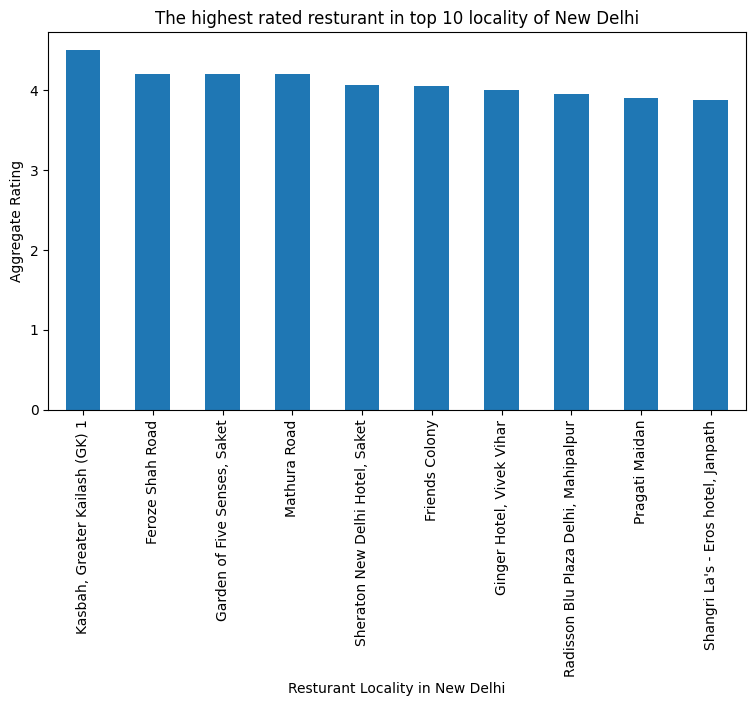

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The best restarants are available in Kesbah, Greater Kailash area.

Now need to find places having worst restaurants

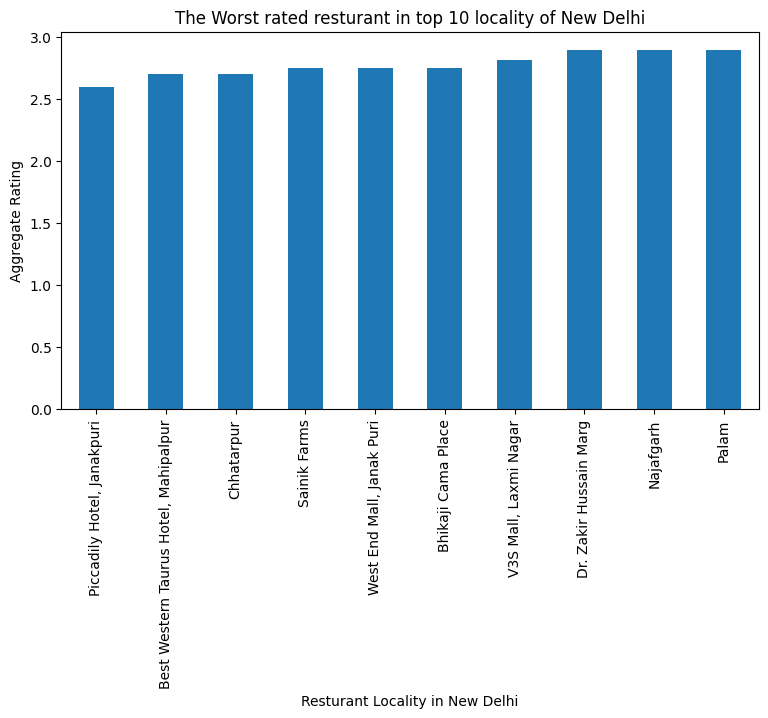

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

Now explore places for Foodies

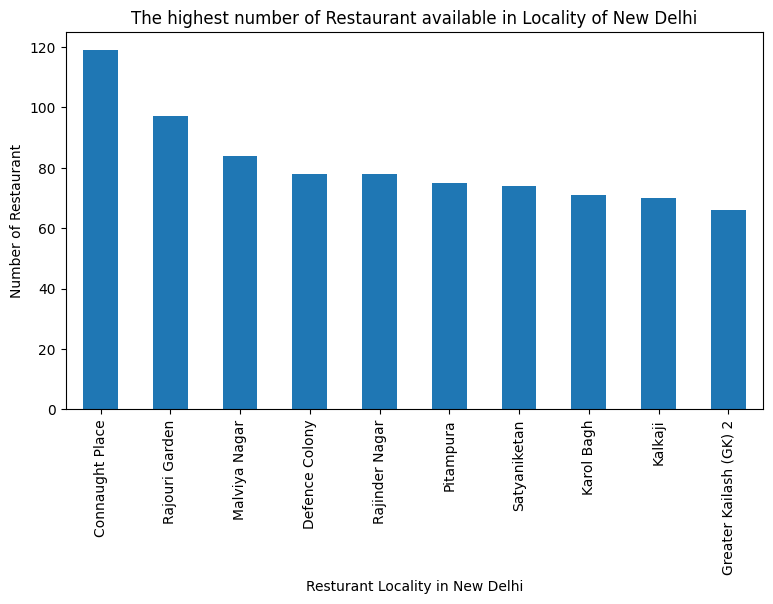

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Connaught Place is the best places for edible person to stay there.

Now opposite! Places not suitable for foodies.

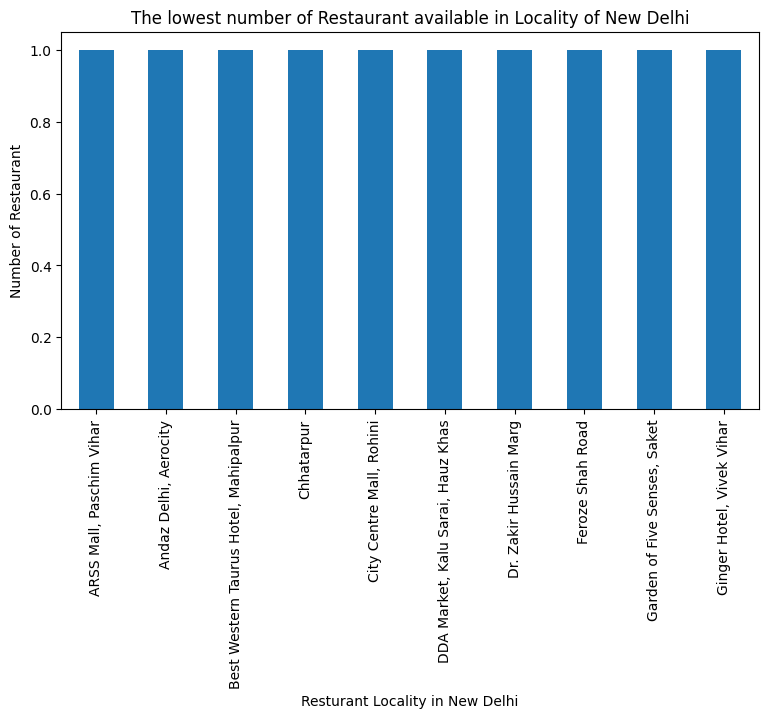

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Want to have chinese! Let's explore the best area for that.

Want to have chinese! Let's explore best places for them...

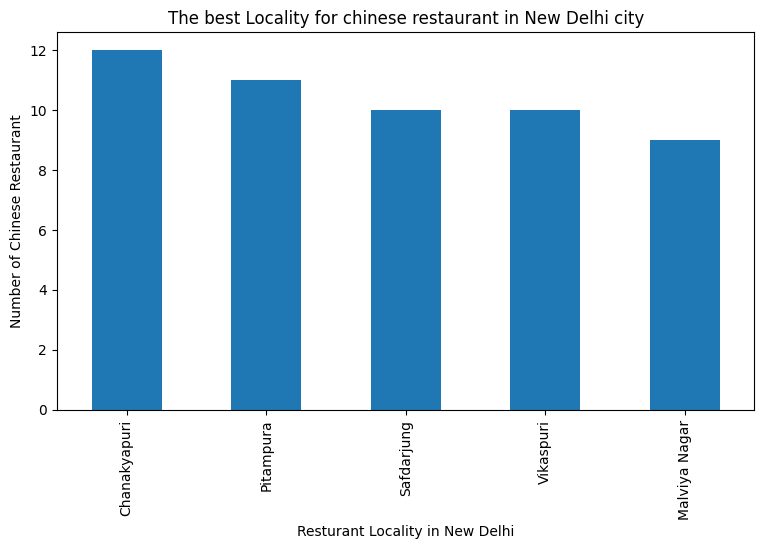

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

Chanakyapuri is the best place for Chinese restaurant.

Now need to find best chinese restaurants

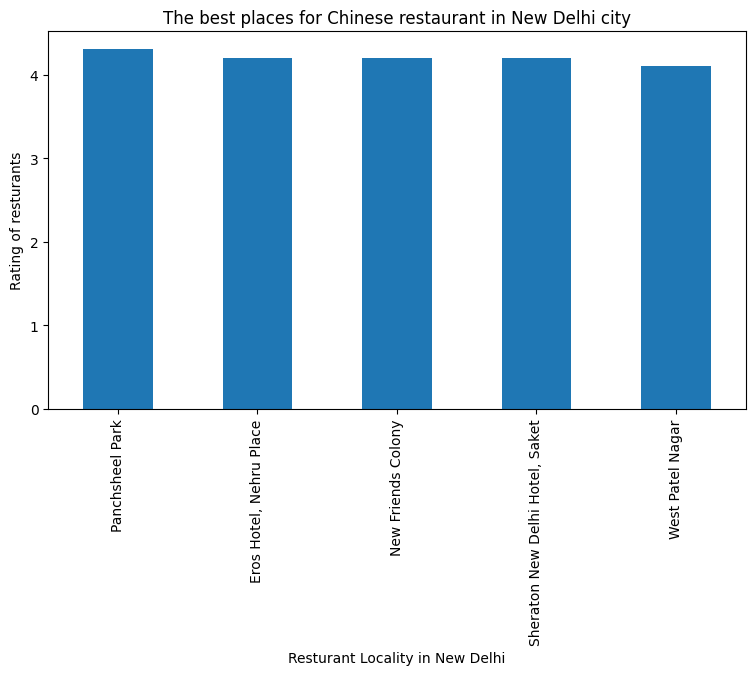

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

Panchsheel park is best Chinese resturants.

Based on locality let's group the data

In [16]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [17]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality  ...  No_of_Votes
0       ARSS Mall, Paschim Vihar  ...          117
1                        Adchini  ...         1560
2  Aditya Mega Mall, Karkardooma  ...          434
3                       Aerocity  ...           59
4  Aggarwal City Mall, Pitampura  ...          126

[5 rows x 8 columns]

In [18]:
df_final.shape

(240, 8)

Define Foursquare Credentials and Version

In [19]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


create a function to repeat the same process to all the Locality in New Delhi

In [20]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

find the venues in all New Delhi Locality

In [21]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [22]:
new_Delhi_venues.head()

Locality  ...      Venue Category
0  ARSS Mall, Paschim Vihar  ...      Sandwich Place
1  ARSS Mall, Paschim Vihar  ...   Indian Restaurant
2  ARSS Mall, Paschim Vihar  ...         Pizza Place
3  ARSS Mall, Paschim Vihar  ...         Coffee Shop
4  ARSS Mall, Paschim Vihar  ...  Chinese Restaurant

[5 rows x 7 columns]

In [23]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  ...  Venue Category
Locality                                           ...                
ARSS Mall, Paschim Vihar                        9  ...               9
Adchini                                         5  ...               5
Aditya Mega Mall, Karkardooma                  10  ...              10
Aerocity                                        7  ...               7
Aggarwal City Mall, Pitampura                   4  ...               4
...                                           ...  ...             ...
West Gate Mall, Rajouri Garden                 17  ...              17
West Patel Nagar                                5  ...               5
Worldmark 1, Aerocity                          29  ...              29
Yusuf Sarai                                    12  ...              12
ibis New Delhi, Aerocity                       28  ...              28

[239 rows x 6 columns]

In [24]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 209 uniques categories.


In [25]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  ...  Wings Joint  Women's Store
0  ARSS Mall, Paschim Vihar    0  ...            0              0
1  ARSS Mall, Paschim Vihar    0  ...            0              0
2  ARSS Mall, Paschim Vihar    0  ...            0              0
3  ARSS Mall, Paschim Vihar    0  ...            0              0
4  ARSS Mall, Paschim Vihar    0  ...            0              0

[5 rows x 210 columns]

In [26]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  ...  Wings Joint  Women's Store
0          ARSS Mall, Paschim Vihar  0.111111  ...          0.0            0.0
1                           Adchini  0.000000  ...          0.0            0.0
2     Aditya Mega Mall, Karkardooma  0.000000  ...          0.0            0.0
3                          Aerocity  0.000000  ...          0.0            0.0
4     Aggarwal City Mall, Pitampura  0.000000  ...          0.0            0.0
..                              ...       ...  ...          ...            ...
234  West Gate Mall, Rajouri Garden  0.000000  ...          0.0            0.0
235                West Patel Nagar  0.000000  ...          0.0            0.0
236           Worldmark 1, Aerocity  0.000000  ...          0.0            0.0
237                     Yusuf Sarai  0.000000  ...          0.0            0.0
238        ibis New Delhi, Aerocity  0.000000  ...          0.0            0.0

[239 rows x 210 columns]

In [34]:
New_Delhi_grouped.shape

(239, 210)

In [28]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2         Coffee Shop  0.11
3      Sandwich Place  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0  Indian Restaurant   0.4
1               Café   0.4
2                Pub   0.2
3                ATM   0.0
4     Nightlife Spot   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1  Indian Restaurant   0.2
2          Multiplex   0.2
3      Shopping Mall   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1   Rental Car Location  0.14
2  Fast Food Restaurant  0.14
3           Coffee Shop  0.14
4        Airport Lounge  0.14


----Aggarwal City Mall, Pitampura----
                     venue  freq
0       Chinese Restaurant  0.25
1              Pizza Place  0.25
2                     Café  0.25
3         Department Store  0.25
4  North Indi

In [29]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality  ... 10th Most Common Venue
0          ARSS Mall, Paschim Vihar  ...             Food Court
1                           Adchini  ...            Flea Market
2     Aditya Mega Mall, Karkardooma  ...            Flea Market
3                          Aerocity  ...             Food Court
4     Aggarwal City Mall, Pitampura  ...            Flea Market
..                              ...  ...                    ...
234  West Gate Mall, Rajouri Garden  ...          Shopping Mall
235                West Patel Nagar  ...      Food & Drink Shop
236           Worldmark 1, Aerocity  ...                 Bakery
237                     Yusuf Sarai  ...                   Park
238        ibis New Delhi, Aerocity  ...                 Lounge

[239 rows x 11 columns]

In [33]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(239,)

In [35]:
# add clustering labels
New_Delhi_merged = df_final.head(239)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality  ...  10th Most Common Venue
0       ARSS Mall, Paschim Vihar  ...              Food Court
1                        Adchini  ...             Flea Market
2  Aditya Mega Mall, Karkardooma  ...             Flea Market
3                       Aerocity  ...              Food Court
4  Aggarwal City Mall, Pitampura  ...             Flea Market

[5 rows x 19 columns]

In [36]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating  ... 9th Most Common Venue  10th Most Common Venue
4    28.690020    3.033333  ...                  Food             Flea Market
5    28.700516    3.040000  ...         Design Studio              Food Court
22   28.654105    3.085714  ...           Flea Market       Fish & Chips Shop
50   28.645084    3.235000  ...           Coffee Shop           Metro Station
57   28.699837    3.376471  ...           Flea Market       Fish & Chips Shop
73   28.643036    3.000000  ...  Fast Food Restaurant              Donut Shop
89   28.539003    3.150000  ...            Food Truck              Food Court
90   28.642755    3.450000  ...                  Café            Liquor Store
98   28.651527    3.490909  ...                  Food             Flea Market
101  28.667644    3.300000  ...            Food Truck              Food Court
104  28.656263    3.097619  ...                  Food             Flea Market
130  28.724100    3.133333  ...            Food Court       Food & Drink Shop
132  28.706295    3.256000  ...            Food Truck              Food Court
135  28.579641    3.180000  ...            Food Truck              Food Court
152  28.544464    3.525000  ...   Fried Chicken Joint       French Restaurant
161  28.639872    3.134483  ...     French Restaurant              Food Truck
170  28.643757    3.575000  ...        Farmers Market              Food Truck
181  28.571849    3.316667  ...     Food & Drink Shop                    Food
188  28.707685    3.168182  ...            Food Truck              Food Court
190  28.577107    3.100000  ...     Food & Drink Shop                    Food
221  28.560593    3.733333  ...            Food Truck              Food Court
225  28.524070    3.686364  ...     French Restaurant              Food Truck
226  28.525054    3.322222  ...            Food Court       Food & Drink Shop
231  28.637492    3.062264  ...     Food & Drink Shop                    Food
235  28.652978    3.500000  ...           Pizza Place           Shopping Mall

[25 rows x 15 columns]

In [38]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  ...         10th Most Common Venue
0    28.668945  ...                     Food Court
1    28.537063  ...                    Flea Market
2    28.656131  ...                    Flea Market
12   28.641698  ...                           Food
13   28.690182  ...                     Food Truck
14   28.693969  ...                           Food
15   28.691136  ...                           Food
18   28.696302  ...                           Food
23   28.656414  ...                     Food Court
24   28.649658  ...                     Food Truck
25   28.495624  ...                           Food
26   28.538688  ...              Food & Drink Shop
33   28.657388  ...                    Flea Market
42   28.576161  ...                 Farmers Market
43   28.643320  ...                     Food Truck
46   28.573241  ...                           Food
49   28.602169  ...            Dumpling Restaurant
55   28.617102  ...              Fish & Chips Shop
61   28.668181  ...                           Food
66   28.699373  ...                     Food Court
71   28.641003  ...                     Food Truck
72   28.705700  ...                     Food Court
76   28.576785  ...                           Food
77   28.631728  ...                  Women's Store
80   28.611614  ...              Food & Drink Shop
82   28.548371  ...              Food & Drink Shop
84   28.630942  ...             Frozen Yogurt Shop
85   28.648885  ...              French Restaurant
92   28.584294  ...              Food & Drink Shop
97   28.662972  ...                           Food
99   28.648795  ...                    Snack Place
103  28.652501  ...              French Restaurant
110  28.635391  ...                           Food
113  28.541242  ...              Food & Drink Shop
116  28.486576  ...                     Food Court
118  28.646549  ...                    Flea Market
126  28.602860  ...              French Restaurant
133  28.708185  ...                    Flea Market
140  28.627959  ...                     Food Court
144  28.591092  ...                     Food Truck
153  28.608055  ...  Vegetarian / Vegan Restaurant
156  28.630734  ...                     Food Truck
158  28.700027  ...                     Food Court
160  28.712975  ...                           Food
165  28.539464  ...              Food & Drink Shop
173  28.714176  ...                    Flea Market
199  28.601779  ...                     Donut Shop
204  28.597038  ...  Vegetarian / Vegan Restaurant
209  28.631362  ...                           Food
210  28.661133  ...                    Flea Market
211  28.579556  ...                 Breakfast Spot
223  28.619954  ...                    Flea Market

[52 rows x 15 columns]

In [39]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating  ... 9th Most Common Venue  10th Most Common Venue
9    28.659870    3.281481  ...     Food & Drink Shop                    Food
59   28.654883    3.053846  ...                  Food             Flea Market
230  28.658041    3.400000  ...     Food & Drink Shop                    Food

[3 rows x 15 columns]

In [40]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  ...          10th Most Common Venue
3    28.553077  ...                      Food Court
10   28.554807  ...  Multicuisine Indian Restaurant
19   28.548827  ...                      Food Truck
35   28.590297  ...                      Hookah Bar
56   28.570246  ...                     Flea Market
60   28.665829  ...               Food & Drink Shop
69   28.550327  ...                          Bakery
70   28.590654  ...                          Market
74   28.621267  ...                             Bar
83   28.552895  ...                          Lounge
111  28.618772  ...                             Gym
112  28.552036  ...                          Lounge
119  28.545033  ...                           Plaza
128  28.608252  ...               Fish & Chips Shop
146  28.535040  ...               Fish & Chips Shop
149  28.642910  ...               Korean Restaurant
162  28.725814  ...               Fish & Chips Shop
163  28.552711  ...                    Cocktail Bar
168  28.543814  ...                     Film Studio
169  28.667261  ...                            Food
174  28.550802  ...                          Lounge
189  28.620715  ...                          Lounge
197  28.592724  ...                          Bakery
205  28.600171  ...            Fast Food Restaurant
213  28.623619  ...                     Snack Place
217  28.535183  ...                     Flea Market
236  28.648177  ...               Food & Drink Shop
238  28.559928  ...                            Park

[28 rows x 15 columns]

In [41]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating  ... 9th Most Common Venue  10th Most Common Venue
6    28.527088    3.117391  ...            Food Court                    Food
7    28.541298    3.425000  ...    Chinese Restaurant      Mexican Restaurant
8    28.555599    3.800000  ...          Dessert Shop                    Food
11   28.562580    3.750000  ...            Food Court       Food & Drink Shop
16   28.630440    3.208333  ...             Nightclub              Food Court
..         ...         ...  ...                   ...                     ...
229  28.692519    3.606452  ...              Tea Room              Food Court
232  28.667344    3.077273  ...            Food Truck              Food Court
233  28.695096    3.050000  ...                   NaN                     NaN
234  28.630044    2.750000  ...           Coffee Shop              Restaurant
237  28.550257    3.220000  ...    Punjabi Restaurant                  Bakery

[131 rows x 15 columns]

Conclusion
1. Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine.
2. Pancsheel park, Nehru place have the best Chinese Resturant.
3. Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
4. Greater kailash, Feroze shah road, Saket have best resturants in New Delhi. #### Cluster 1: It is most recommended for Indian Restaurants. 
#### Cluster 2: It is most recommended for Hotels and nightclub. 
#### Cluster 3 and Cluster 5: It is most recommended for Fast food. 
#### Cluster 4: It is most recommended for the cafe and pizza.